In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

## Test

88106928.17731813
88104887.30080138 803526122.185617


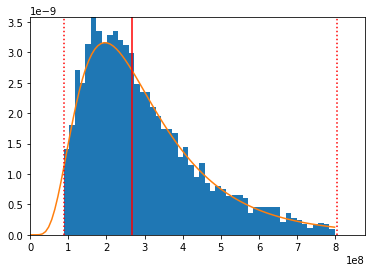

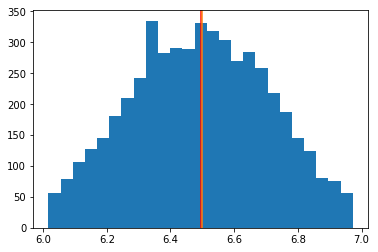

In [3]:
from synthacc.source.scaling import WC1994_m2a, WC1994_a2m


magnitude = 6.5
n = 2

srf = WC1994_m2a()
srb = WC1994_a2m()

areas = [srf.sample(magnitude, n) for i in range(5000)]
print(min(areas))


d = stats.lognorm(s=srf.SD*(np.log(10)), scale=srf.get_mean(magnitude))
xs = np.linspace(0, max(areas), 100)

plt.hist(areas, bins=50, density=True)
plt.plot(xs, d.pdf(xs))

plt.axvline(srf.get_mean(magnitude), c='r')
sd_min, sd_max = srf.get_sd(magnitude, n)
print(sd_min, sd_max)
plt.axvline(sd_min, c='r', ls=':')
plt.axvline(sd_max, c='r', ls=':')

plt.xlim(0, max(areas)*1.1)
plt.show()

## Check if with the mean of the areas the origin magnitude is found
mean = np.mean(areas)
mags = [srb.sample(mean, n=n) for i in range(5000)]

plt.hist(mags, bins=25)
plt.axvline(srb.get_mean(mean), c='r')
plt.axvline(magnitude, c=colors[1])
plt.show()

## Magnitude 2 area

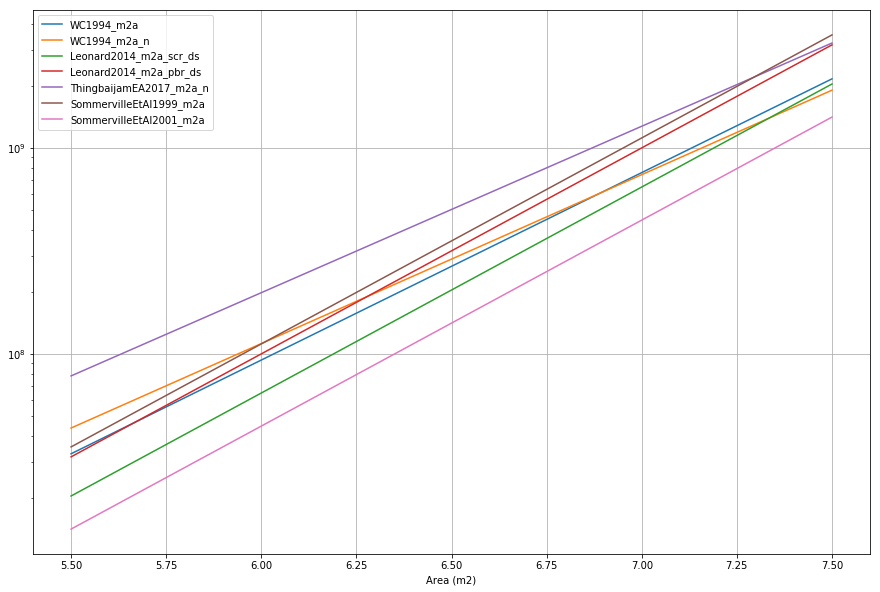

In [4]:
from synthacc.source.scaling import WC1994_m2a, WC1994_m2a_n, Leonard2014_m2a_scr_ds, Leonard2014_m2a_pbr_ds, ThingbaijamEA2017_m2a_n, ThingbaijamEA2017_m2a_s, SommervilleEtAl1999_m2a, SommervilleEtAl2001_m2a
from synthacc.source.moment import mw_to_m0


scs = [
    WC1994_m2a(),
    WC1994_m2a_n(),
    Leonard2014_m2a_scr_ds(),
    Leonard2014_m2a_pbr_ds(),
    ThingbaijamEA2017_m2a_n(),
#    ThingbaijamEA2017_m2a_s(),
    SommervilleEtAl1999_m2a(),
    SommervilleEtAl2001_m2a(),
]

mags = np.linspace(5.5, 7.5, 100)

plt.figure(figsize=(15, 10))

for i, sc in enumerate(scs):
    avg_areas = []
    min_areas = []
    max_areas = []
    for m in mags:
        a = sc.get_mean(float(m))
        avg_areas.append(a)
        if sc.SD is not None:
            sd = sc.get_sd(m, n=1)
            min_areas.append(sd[0])
            max_areas.append(sd[1])

    plt.semilogy(mags, avg_areas, c=colors[i], label=sc.__class__.__name__)
    #plt.scatter([6.5], [sc.sample(6.5)], c=colors[i])
#    if sc.SD is not None:
#        plt.semilogy(mags, min_areas, c=colors[i], ls='--')
#        plt.semilogy(mags, max_areas, c=colors[i], ls='--')

xlabel, ylabel = 'Magnitude', 'Area (m2)'

plt.grid()
plt.xlabel(xlabel)
plt.xlabel(ylabel)
plt.legend()
plt.show()

## Magnitude 2 length

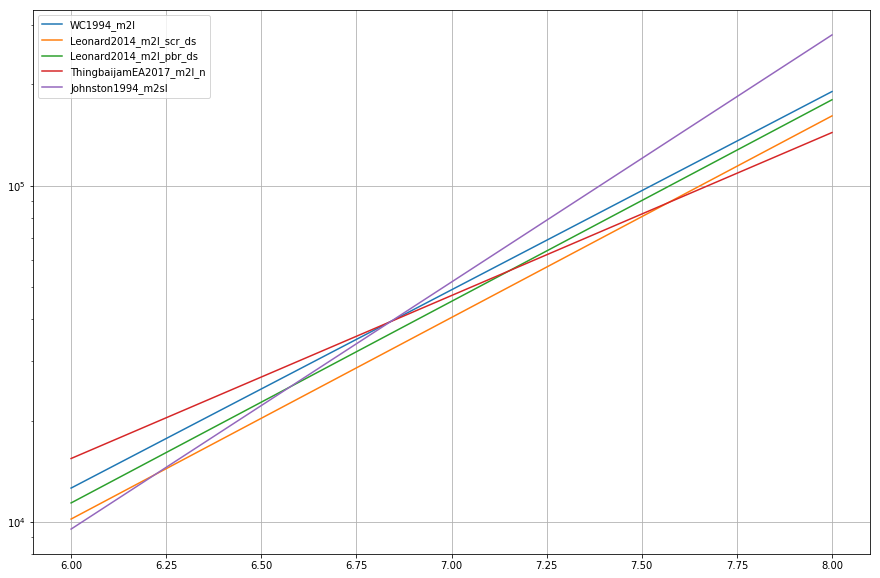

In [5]:
from synthacc.source.scaling import WC1994_m2sl, WC1994_m2l, WC1994_m2l_n, Leonard2014_m2l_scr_ds, Leonard2014_m2l_pbr_ds, ThingbaijamEA2017_m2l_n, ThingbaijamEA2017_m2l_s, Johnston1994_m2sl


scs = [
#    WC1994_m2sl(),
    WC1994_m2l(),
#    WC1994_m2l_n(),
    Leonard2014_m2l_scr_ds(),
    Leonard2014_m2l_pbr_ds(),
    ThingbaijamEA2017_m2l_n(),
#    ThingbaijamEA2017_m2l_s(),
    Johnston1994_m2sl(),
    ]

mags = np.linspace(6, 8, 100)

plt.figure(figsize=(15, 10))

for i, sc in enumerate(scs):
    avg_lengths = []
    min_lengths = []
    max_lengths = []
    for m in mags:
        l = sc.get_mean(float(m))
        avg_lengths.append(l)
        if sc.SD is not None:
            sd = sc.get_sd(m, n=1)
            min_lengths.append(sd[0])
            max_lengths.append(sd[1])

    plt.semilogy(mags, avg_lengths, c=colors[i], label=sc.__class__.__name__)
#    if sc.SD is not None:
#        plt.semilogy(mags, min_lengths, c=colors[i], ls='--')
#        plt.semilogy(mags, max_lengths, c=colors[i], ls='--')

plt.grid()
plt.legend()
plt.show()

## Standard deviation

9030.288206064444 67905.19083518966
9015.711376059571 68391.16472814293


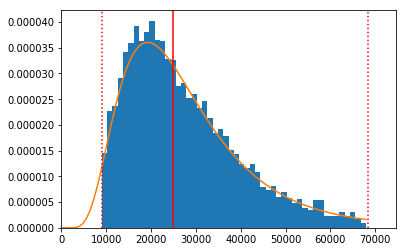

In [6]:
from synthacc.source.scaling import WC1994_m2l

magnitude = 6.5
n = 2

sr = WC1994_m2l()

lengths = [sr.sample(magnitude, n) for i in range(5000)]
print(min(lengths), max(lengths))

d = stats.lognorm(s=sr.SD*(np.log(10)), scale=sr.get_mean(magnitude))
xs = np.linspace(0, max(lengths), 100)

plt.hist(lengths, bins=50, density=True)
plt.plot(xs, d.pdf(xs))
plt.axvline(sr.get_mean(magnitude), c='r')
sd_min, sd_max = sr.get_sd(magnitude, n)
print(sd_min, sd_max)
plt.axvline(sd_min, c='r', ls=':')
plt.axvline(sd_max, c='r', ls=':')
plt.xlim(0, max(lengths)*1.1)
plt.show()


Conclusions:
- aspect ratio: between 1 and 2 (only important for smaller earthquakes) from Leonard (2010), Thingbaijim et al 2017 and Wesnousky 2008
- Use
  + WC A
  + WC L
  + T A n
  + T L n
 - SD of 1 or 2? 1 is not enough but 2 maybe too much. For now 2! Note: it is log SD so SD=2 gives already high values.